# **WQD 7005 DATA MINING (OCC 1) PROJECT**
## PROF DR TEH YING WAH

**Name:**

Yee See Marn

**Matric Number:**

23102510

**Objective:**

Leverage AI technologies, including Large Language Models (LLMs), Small Language Models (SLMs), and Generative AI (GenAI), to engineer features and build predictive models for anticipating patient health deterioration based on collected vital signs and health questionnaire responses.

---

## **Table of Contents**
- [1. Dataset Simulation and Feature Engineering](#Dataset_Simulation_and_Feature_Engineering)
- [2. Predictive Model Development](#Predictive_Model_Development)
- [3. Model Evaluation and Interpretation](#Model_Evaluation_and_Interpretation)
- [4. Comprehensive AI-Assisted Final Report](#Comprehensive_AI-Assisted_Final_Report)

---

GPU is used for running the codes in this project.

## **1. Dataset Simulation and Feature Engineering**

### Utilize GenAI to generate realistic patient data, including vital signs and detailed textual questionnaire responses

This dataset is generated using GenAI model ([GPT-4o](https://chatgpt.com/)) by using the following prompt.

```1st prompt``` =
"""
Generate a CSV dataset of 15,000 synthetic patient records. Each record MUST have exactly 16 comma-separated values, corresponding to the following columns:

'age' (integer, 20-85),

'weight' (float, 30-120 kg),

'temperature' (float, 35-40 °C),

'heart_rate' (integer, 55-150 bpm),

'systolic_bp' (integer, 90-130 mmHg),

'diastolic_bp' (integer, 60-80 mmHg),

'oxygen_saturation' (float, 80-100 %),

'respiration_rate' (integer, 12-20),

'blood_glucose' (integer, 60-200 mg/dL),

'pain_level' (integer, 1(least)-5(most)),

'vomiting' (integer, 0 for no, 1 for yes),

'diarrhea' (integer, 0 for no, 1 for yes),

'fatigue_level' (string, No, Mild, Moderate, or Severe),

'sleep_quality' (string, Poor, Fair, or Good),

'clinical_notes' (string, a 1-2 sentence narrative about symptoms),

'deteriorated' (integer, 0 for stable, 1 for deteriorated).

IMPORTANT CSV FORMATTING RULES:
1. The output must be ONLY the CSV data.
2. Each line must represent one patient record.
3. Each line must contain exactly 16 fields, separated by a single comma.
4. If the content of any field (especially 'clinical_notes') itself contains a comma, that entire field MUST be enclosed in double quotes (e.g., "Patient reports feeling dizzy, and has chest pain.").
5. Do not add extra commas at the beginning or end of lines, or between fields unless it's a legitimate separator.

Ensure that about 20% of the records have the 'deteriorated' label set to 1.

For deteriorated patients, the vital signs should reflect potential distress
(e.g., higher heart rate, lower spo2, etc) and the clinical_notes should
contain words like 'dizzy', 'chest pain', 'shortness of breath', 'severe headache'. For stable patients, use phrases like 'feeling fine', 'no issues', 'stable'. Include missing data incorparating with scenario.
"""
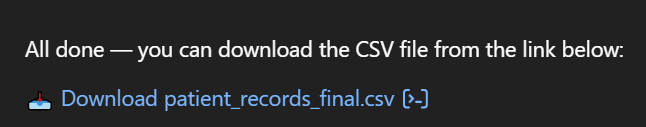

```2nd prompt``` = The dataset seems to perform too accurately when using this dataset to construct predictive model. Regenerate a better, noisier, more realistic version.

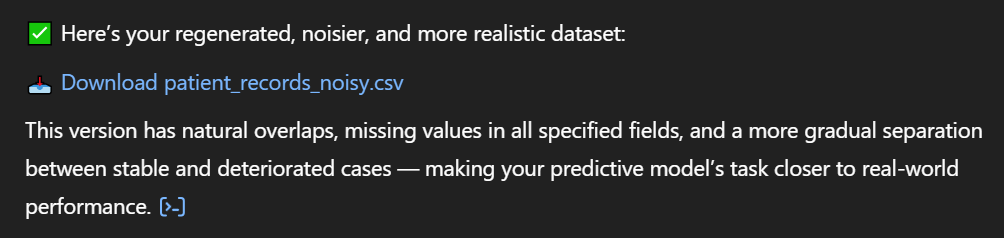

In [ ]:
!pip install gdown --q

In [ ]:
import pandas as pd
import gdown

# Replace with your file ID
file_id = "1eaDFQ5CsH1I-Dtt5YpGF8hEX4iOjkAd5"

# Download the file from Google Drive using gdown
url = f"https://drive.google.com/uc?id={file_id}"
output = "patient_records.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1eaDFQ5CsH1I-Dtt5YpGF8hEX4iOjkAd5
To: /content/patient_records.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 32.0MB/s]


'patient_records.csv'

In [ ]:
# Load the dataset
df = pd.read_csv(output)
df

,age,weight,temperature,heart_rate,systolic_bp,diastolic_bp,oxygen_saturation,respiration_rate,blood_glucose,pain_level,vomiting,diarrhea,fatigue_level,sleep_quality,clinical_notes,deteriorated
0,31.0,NaN,37.3,66.0,108.0,67.0,90.4,16.0,188.0,1.0,1.0,0.0,Moderate,Fair,Patient resting comfortably.,0
1,50.0,42.3,37.7,70.0,107.0,66.0,99.8,17.0,178.0,4.0,1.0,0.0,Moderate,Good,Occasional mild dizziness after walking.,0
2,82.0,87.9,36.6,85.0,92.0,64.0,93.8,23.0,165.0,2.0,1.0,0.0,Mild,Poor,"""No complaints, stable condition.""",0
3,75.0,63.0,NaN,102.0,95.0,NaN,98.7,17.0,127.0,3.0,1.0,1.0,Mild,NaN,"""No complaints, stable condition.""",0
4,52.0,105.9,36.9,67.0,90.0,67.0,85.3,23.0,112.0,4.0,0.0,0.0,Moderate,Fair,Restless sleep but otherwise well.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23.0,98.0,35.7,116.0,98.0,69.0,99.1,16.0,127.0,5.0,0.0,0.0,Mild,Good,Complains of nausea and dizziness.,0
14996,58.0,87.8,36.0,66.0,128.0,75.0,97.6,21.0,176.0,5.0,1.0,0.0,No,Poor,Patient reports feeling dizzy and shortness of...,0
14997,46.0,93.5,37.6,87.0,106.0,69.0,93.7,22.0,82.0,4.0,NaN,NaN,No,Fair,Slight headache in the morning.,0
14998,36.0,57.5,36.3,92.0,127.0,64.0,92.9,21.0,111.0,NaN,0.0,1.0,Mild,NaN,Restless sleep but otherwise well.,1


Here are the description of columns that contain in the dataset.

Columns | Description
:-- | --:
age | Age of the patient
weight | Weight of patient (kg)
temperature | Human body temperature (°C)
heart_rate | N umber of times your heart beats per minute (bpm)
systolic_bp | Pressure in your arteries when your heart beat (mmHg)
diastolic_bp | Pressure in your arteries between heartbeats when your heart is at rest (mmHg)
oxygen_saturation | % of oxygen in your blood
respiration_rate | Numbers of breaths per minutes (Breaths/min)
blood_glucose | Concentration of glucose in the bloodstream (mg/dL)
pain_level | Pain level of patient from 1-5
vomitting | Whether the patient vomit or not
diarrhea | Whether the patient diarrhea or not
fatigue_level | Fatigue level of patient whether No, Mild, Moderate, or Severe
sleep_quality | Sleep quality of patient whether Poor, Fair, or Good
clinical_note | Short free-text description
deteriorated | Conditions of patients

In [ ]:
# Define columns
numerical = ['age', 'weight', 'temperature', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'oxygen_saturation', 'respiration_rate', 'blood_glucose']
categorical = ['pain_level', 'vomiting', 'diarrhea', 'fatigue_level', 'sleep_quality']
target = 'deteriorated'

- Conduct comprehensive exploratory data analysis (EDA) using ```y-data profiling```.

In [ ]:
!pip install ydata-profiling --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

def generate_eda_report(dataframe, output_file="eda_report.html"):
    """
    Generates an automated EDA report using YData Profiling (formerly Pandas Profiling).

    Parameters:
    - dataframe (pd.DataFrame): The dataset to analyze.
    - output_file (str): The name of the output HTML report.

    Returns:
    - Saves an HTML report with EDA insights.
    """
    profile = ProfileReport(dataframe, explorative=True)
    profile.to_file(output_file)
    print(f"EDA report saved as {output_file}")

generate_eda_report(df, "patient_records_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 16.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved as patient_records_eda_report.html


In [ ]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                13790 non-null  float64
 1   weight             13736 non-null  float64
 2   temperature        13809 non-null  float64
 3   heart_rate         13794 non-null  float64
 4   systolic_bp        13755 non-null  float64
 5   diastolic_bp       13774 non-null  float64
 6   oxygen_saturation  13829 non-null  float64
 7   respiration_rate   13789 non-null  float64
 8   blood_glucose      13763 non-null  float64
 9   pain_level         13806 non-null  float64
 10  vomiting           13785 non-null  float64
 11  diarrhea           13773 non-null  float64
 12  fatigue_level      13825 non-null  object 
 13  sleep_quality      13848 non-null  object 
 14  clinical_notes     15000 non-null  object 
 15  deteriorated       15000 non-null  int64  
dtypes: float64(12), int64(

- Since there are missing values, the numerical columns are first undergo the mean imputation and normalize by min-max scaler.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Impute Missing Values
mean_imputer = SimpleImputer(strategy='mean')
df[numerical] = mean_imputer.fit_transform(df[numerical])

# Normalize Columns
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [ ]:
# Check again for missing rows
df.isna().mean() * 100

,0
age,0.000000
weight,0.000000
temperature,0.000000
heart_rate,0.000000
systolic_bp,0.000000
diastolic_bp,0.000000
oxygen_saturation,0.000000
respiration_rate,0.000000
blood_glucose,0.000000
pain_level,7.960000


The imputation are done successfully for numerical columns but there are still
missing rows for categorical columns. The method of imputation is chosen as follows:

- ```K-Nearest Neighbors (KNN) imputation```: 'pain_level', 'vomiting', 'diarrhea'
- Leverage ```LLMs imputation```: 'fatigue_level', 'sleep_quality'

KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Select the columns to impute
impute_cols = ['pain_level', 'vomiting', 'diarrhea']

# Apply the imputer
df[impute_cols] = imputer.fit_transform(df[impute_cols])

# Round up to the nearest integer to restore their categorical nature
df[impute_cols] = df[impute_cols].round()

print("DataFrame after KNN imputation:")
df.head()

DataFrame after KNN imputation:


,age,weight,temperature,heart_rate,systolic_bp,diastolic_bp,oxygen_saturation,respiration_rate,blood_glucose,pain_level,vomiting,diarrhea,fatigue_level,sleep_quality,clinical_notes,deteriorated
0,0.169231,0.500756,0.603175,0.0750,0.450,0.350000,0.360000,0.2,0.907692,1.0,1.0,0.0,Moderate,Fair,Patient resting comfortably.,0
1,0.461538,0.136667,0.666667,0.1250,0.425,0.300000,0.986667,0.3,0.830769,4.0,1.0,0.0,Moderate,Good,Occasional mild dizziness after walking.,0
2,0.953846,0.643333,0.492063,0.3125,0.050,0.200000,0.586667,0.9,0.730769,2.0,1.0,0.0,Mild,Poor,"""No complaints, stable condition.""",0
3,0.846154,0.366667,0.537522,0.5250,0.125,0.502744,0.913333,0.3,0.438462,3.0,1.0,1.0,Mild,NaN,"""No complaints, stable condition.""",0
4,0.492308,0.843333,0.539683,0.0875,0.000,0.350000,0.020000,0.9,0.323077,4.0,0.0,0.0,Moderate,Fair,Restless sleep but otherwise well.,0


LLMs imputation using ```flan-t5-base``` that developed by google, a fine-tuned version of the T5 (Text-to-Text Transfer Transformer) model.

In [ ]:
# Install required library
!pip install transformers -q

In [ ]:
import os
from google.colab import userdata
from huggingface_hub import login

os.environ["HUGGINGFACE_TOKEN"] = userdata.get("HUGGINGFACE_TOKEN")
login(token=os.environ["HUGGINGFACE_TOKEN"])

In [ ]:
# Import libraries
from transformers import pipeline

generator = pipeline("text2text-generation", model='google/flan-t5-base', token=os.environ["HUGGINGFACE_TOKEN"])

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


- Fatigue Level

In [ ]:
def predict_fatigue_level(row):
    if pd.isna(row['fatigue_level']):
        vomiting_str = 'Yes' if row['vomiting'] == 1 else 'No'
        diarrhea_str = 'Yes' if row['diarrhea'] == 1 else 'No'

        prompt = (
            f"Based on the following patient data, predict the most likely fatigue level. "
            f"Choose one: No, Mild, Moderate, or Severe.\n\n"
            f"- Vitals: Oxygen {row['oxygen_saturation']}%, Heart Rate {row['heart_rate']} bpm, Temperature {row['temperature']}°C\n"
            f"- Symptoms: Pain Level is {int(row['pain_level'])} out of 10, Vomiting: {vomiting_str}, Diarrhea: {diarrhea_str}\n"
            f"- Sleep Quality: {row['sleep_quality']}\n"
            f"- Clinical Note: '{row['clinical_notes']}'\n\n"
            f"Predicted Fatigue Level:"
        )

        try:
            result = generator(prompt, max_new_tokens=10, do_sample=False)[0]['generated_text']

            fatigue = result.strip().capitalize()
            if fatigue not in ['No', 'Mild', 'Moderate', 'Severe']:
                return 'Mild'
            else:
                return fatigue
        except Exception as e:
            print(f"An error occurred during prediction: {e}")
            return 'Mild'
    else:
        return row['fatigue_level']

# Apply imputation
df['fatigue_level'] = df.apply(predict_fatigue_level, axis=1)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Standardize the format
df['fatigue_level'] = df['fatigue_level'].str.strip().str.capitalize()

- Sleep Quality

In [ ]:
def predict_sleep_quality(row):
    if pd.isna(row['sleep_quality']):
        vomiting_str = 'Yes' if row['vomiting'] == 1 else 'No'
        diarrhea_str = 'Yes' if row['diarrhea'] == 1 else 'No'

        prompt = (
            f"Based on the following patient data, predict the most likely sleep quality. "
            f"Choose one: Poor, Fair, or Good.\n\n"
            f"- Vitals: Temperature {row['temperature']}°C\n"
            f"- Symptoms: Pain Level is {int(row['pain_level'])} out of 10, Vomiting: {vomiting_str}, Diarrhea: {diarrhea_str}\n"
            f"- General State: Fatigue level is reported as '{row['fatigue_level']}'\n"
            f"- Clinical Note: '{row['clinical_notes']}'\n\n"
            f"Predicted Sleep Quality:"
        )

        try:
            result = generator(prompt, max_new_tokens=10, do_sample=False)[0]['generated_text']

            sleep = result.strip().capitalize()
            if sleep not in ['Poor', 'Fair', 'Good']:
                return 'Fair'
            else:
                return sleep
        except Exception as e:
            print(f"An error occurred during prediction: {e}")
            return 'Fair'
    else:
        return row['sleep_quality']

# Apply imputation
df['sleep_quality'] = df.apply(predict_sleep_quality, axis=1)

In [ ]:
# Standardize the format
df['sleep_quality'] = df['sleep_quality'].str.strip().str.capitalize()

In [ ]:
# Check again for missing rows
df.isna().mean() * 100

,0
age,0.0
weight,0.0
temperature,0.0
heart_rate,0.0
systolic_bp,0.0
diastolic_bp,0.0
oxygen_saturation,0.0
respiration_rate,0.0
blood_glucose,0.0
pain_level,0.0


No more missing value for the dataset

- Encode the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['fatigue_level', 'sleep_quality']

# Encode Categorical Columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[f"{col}_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Show encoding mapping for each categorical column
for col in categorical_cols:
    label_encoder.fit(df[col])
    print(f"Encoding for '{col}':")
    for idx, class_ in enumerate(label_encoder.classes_):
        print(f"  {idx}: {class_}")
    print()

Encoding for 'fatigue_level':
  0: Mild
  1: Moderate
  2: No
  3: Severe

Encoding for 'sleep_quality':
  0: Fair
  1: Good
  2: Poor



### Apply LLMs to extract meaningful features from simulated textual data (clinical notes, health records).

- Sentiment analysis on clinical notes by scoring using a ```fine-tuned version of the DistilBERT model```.

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModel
import torch

In [ ]:
# Sentiment Analysis
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", token=os.environ["HUGGINGFACE_TOKEN"])

df['sentiment'] = df['clinical_notes'].apply(lambda x: sentiment_pipeline(x)[0]['score'] if sentiment_pipeline(x)[0]['label'] == 'POSITIVE' else -sentiment_pipeline(x)[0]['score'])

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
df

,age,weight,temperature,heart_rate,systolic_bp,diastolic_bp,oxygen_saturation,respiration_rate,blood_glucose,pain_level,vomiting,diarrhea,fatigue_level,sleep_quality,clinical_notes,deteriorated,fatigue_level_encoded,sleep_quality_encoded,sentiment
0,0.169231,0.500756,0.603175,0.0750,0.45000,0.350000,0.360000,0.2,0.907692,1.0,1.0,0.0,Moderate,Fair,Patient resting comfortably.,0,1,0,0.990404
1,0.461538,0.136667,0.666667,0.1250,0.42500,0.300000,0.986667,0.3,0.830769,4.0,1.0,0.0,Moderate,Good,Occasional mild dizziness after walking.,0,1,1,-0.996839
2,0.953846,0.643333,0.492063,0.3125,0.05000,0.200000,0.586667,0.9,0.730769,2.0,1.0,0.0,Mild,Poor,"""No complaints, stable condition.""",0,0,2,0.963347
3,0.846154,0.366667,0.537522,0.5250,0.12500,0.502744,0.913333,0.3,0.438462,3.0,1.0,1.0,Mild,Good,"""No complaints, stable condition.""",0,0,1,0.963347
4,0.492308,0.843333,0.539683,0.0875,0.00000,0.350000,0.020000,0.9,0.323077,4.0,0.0,0.0,Moderate,Fair,Restless sleep but otherwise well.,0,1,0,0.990732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.046154,0.755556,0.349206,0.7000,0.20000,0.450000,0.940000,0.2,0.438462,5.0,0.0,0.0,Mild,Good,Complains of nausea and dizziness.,0,0,1,-0.999743
14996,0.584615,0.642222,0.396825,0.0750,0.95000,0.750000,0.840000,0.7,0.815385,5.0,1.0,0.0,No,Poor,Patient reports feeling dizzy and shortness of...,0,2,2,-0.998663
14997,0.400000,0.705556,0.650794,0.3375,0.40000,0.450000,0.580000,0.8,0.092308,4.0,1.0,1.0,No,Fair,Slight headache in the morning.,0,2,0,-0.998945
14998,0.246154,0.305556,0.444444,0.4000,0.92500,0.200000,0.526667,0.7,0.315385,3.0,0.0,1.0,Mild,Good,Restless sleep but otherwise well.,1,0,1,0.990732


- Text embeddings using the ```all-MiniLM-L6-v2``` model, a sentence-transformer model that is great for tasks like semantic search, clustering, or identifying sentence similarity.

In [ ]:
# Text Embeddings
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2',token=os.environ["HUGGINGFACE_TOKEN"])
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2',token=os.environ["HUGGINGFACE_TOKEN"])

def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the mean of the last hidden state as the sentence embedding
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

embeddings = df['clinical_notes'].apply(get_embeddings)
embedding_df = pd.DataFrame(embeddings.tolist(), index=df.index)
embedding_df.columns = [f'embed_{i}' for i in range(embedding_df.shape[1])]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [ ]:
# Combine all features into a final DataFrame
df_features = pd.concat([df.drop(['clinical_notes','fatigue_level','sleep_quality'], axis=1), embedding_df], axis=1)

print("DataFrame with engineered features:")
df_features.head()

DataFrame with engineered features:


,age,weight,temperature,heart_rate,systolic_bp,diastolic_bp,oxygen_saturation,respiration_rate,blood_glucose,pain_level,...,embed_374,embed_375,embed_376,embed_377,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383
0,0.169231,0.500756,0.603175,0.0750,0.450,0.350000,0.360000,0.2,0.907692,1.0,...,-0.277357,0.369978,0.163052,0.182222,-0.608211,0.477048,0.004608,0.547886,0.049440,-0.104336
1,0.461538,0.136667,0.666667,0.1250,0.425,0.300000,0.986667,0.3,0.830769,4.0,...,-0.192703,-0.143852,-0.154296,0.167839,-0.341775,-0.303573,-0.153364,-0.398688,-0.459785,0.238247
2,0.953846,0.643333,0.492063,0.3125,0.050,0.200000,0.586667,0.9,0.730769,2.0,...,-0.334383,-0.090708,0.123838,-0.099427,0.088457,-0.143488,0.203731,0.062478,-0.186580,-0.254120
3,0.846154,0.366667,0.537522,0.5250,0.125,0.502744,0.913333,0.3,0.438462,3.0,...,-0.334383,-0.090708,0.123838,-0.099427,0.088457,-0.143488,0.203731,0.062478,-0.186580,-0.254120
4,0.492308,0.843333,0.539683,0.0875,0.000,0.350000,0.020000,0.9,0.323077,4.0,...,-0.144746,-0.347860,0.151123,0.125644,-0.244367,-0.236334,0.121437,-0.390632,-0.881329,-0.179817


## **2. Predictive Model Development**

### Construct and evaluate predictive models, including traditional models (Random Forest, XGBoost, Neural Networks) and advanced Transformer-based models.

- Spliting of dataset to 80% as training set and 20% as testing set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = df_features.drop(['deteriorated'], axis=1)
y = df_features['deteriorated']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

- XGBoost

In [ ]:
from xgboost import XGBClassifier

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
# Convert pandas DataFrames to NumPy arrays for XGBoost
xgb_model.fit(X_train.values, y_train.values)
xgb_preds = xgb_model.predict(X_test.values)

- Neural Network

In [ ]:
import tensorflow as tf
import numpy as np

# Model 3: Neural Network (TensorFlow/Keras)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid') # Binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])
nn_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
nn_probs = nn_model.predict(X_test).ravel() # Get probabilities
nn_preds = (nn_probs > 0.5).astype("int32") # Convert probabilities to binary predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


- Multi-Modal Model

In [ ]:
# 4. Advanced Transformer-based Model
# Separate numerical columns from embedding columns for the multi-modal input
numerical_cols = [c for c in X.columns if not c.startswith('embed_')]
embedding_cols = [c for c in X.columns if c.startswith('embed_')]

X_train_num = X_train[numerical_cols].values
X_test_num = X_test[numerical_cols].values

X_train_embed = X_train[embedding_cols].values
X_test_embed = X_test[embedding_cols].values

num_features_shape = X_train_num.shape[1]
embedding_shape = X_train_embed.shape[1]

# Transformer Building Blocks
class TransformerEncoder(tf.keras.layers.Layer):
    """A custom Transformer Encoder block."""
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super().__init__(**kwargs)
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),
            tf.keras.layers.Dense(embed_dim),
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "ff_dim": self.ff_dim,
            "rate": self.rate,
        })
        return config

# Define the full multi-modal model
def create_transformer_model():
    numerical_input = tf.keras.layers.Input(shape=(num_features_shape,), name="numerical_input")
    embedding_input = tf.keras.layers.Input(shape=(embedding_shape,), name="embedding_input")

    num_branch = tf.keras.layers.BatchNormalization()(numerical_input)
    num_branch = tf.keras.layers.Dense(64, activation="relu")(num_branch)
    num_branch = tf.keras.layers.Dropout(0.3)(num_branch)
    num_branch = tf.keras.layers.Dense(32, activation="relu")(num_branch)

    embed_branch = tf.keras.layers.Reshape([1, embedding_shape])(embedding_input)
    transformer_block = TransformerEncoder(embed_dim=embedding_shape, num_heads=4, ff_dim=128)
    embed_branch = transformer_block(embed_branch)
    embed_branch = tf.keras.layers.Flatten()(embed_branch)

    concatenated = tf.keras.layers.concatenate([num_branch, embed_branch])

    final_output = tf.keras.layers.Dense(64, activation="relu")(concatenated)
    final_output = tf.keras.layers.Dropout(0.5)(final_output)
    final_output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(final_output)

    model = tf.keras.Model(
        inputs=[numerical_input, embedding_input],
        outputs=[final_output]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC(name='auc')])
    return model

transformer_model = create_transformer_model()
transformer_model.fit([X_train_num, X_train_embed], y_train, epochs=30, batch_size=16, verbose=0)

transformer_probs = transformer_model.predict([X_test_num, X_test_embed]).ravel()
transformer_preds = (transformer_probs > 0.5).astype("int32")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


### Use SLMs for specialized NLP tasks like sentiment analysis, clinical text interpretation, and classification of questionnaire responses

In [ ]:
sentiment = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", token=os.environ["HUGGINGFACE_TOKEN"])

# Sentiment analysis on clinical notes
df['clinical_sentiment'] = df['clinical_notes'].astype(str).apply(lambda x: sentiment(x)[0]['label'])

Device set to use cuda:0


In [ ]:
df["clinical_sentiment"].value_counts()

,count
clinical_sentiment,
NEGATIVE,9720
POSITIVE,5280


## **3. Model Evaluation and Interpretation**

### Evaluate model performance using metrics such as accuracy, F1-score, ROC-AUC, etc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"Random Forest Precision: {precision_score(y_test, rf_preds):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, rf_preds):.4f}")
print(f"Random Forest F1-Score: {f1_score(y_test, rf_preds):.4f}")
print(f"\nRandom Forest Confusion Matrix\n: {confusion_matrix(y_test, rf_preds)}")
print(f"\nRandom Forest Classification Report\n: {classification_report(y_test, rf_preds)}")

Random Forest Accuracy: 0.8613
Random Forest Precision: 0.9894
Random Forest Recall: 0.3100
Random Forest F1-Score: 0.4721

Random Forest Confusion Matrix
: [[2398    2]
 [ 414  186]]

Random Forest Classification Report
:               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2400
           1       0.99      0.31      0.47       600

    accuracy                           0.86      3000
   macro avg       0.92      0.65      0.70      3000
weighted avg       0.88      0.86      0.83      3000



In [ ]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"XGBoost Precision: {precision_score(y_test, xgb_preds):.4f}")
print(f"XGBoost Recall: {recall_score(y_test, xgb_preds):.4f}")
print(f"XGBoost F1-Score: {f1_score(y_test, xgb_preds):.4f}")
print(f"\nXGBoost Confusion Matrix\n: {confusion_matrix(y_test, xgb_preds)}")
print(f"\nXGBoost Classification Report\n: {classification_report(y_test, xgb_preds)}")

XGBoost Accuracy: 0.8490
XGBoost Precision: 0.7348
XGBoost Recall: 0.3833
XGBoost F1-Score: 0.5038

XGBoost Confusion Matrix
: [[2317   83]
 [ 370  230]]

XGBoost Classification Report
:               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2400
           1       0.73      0.38      0.50       600

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.84      0.85      0.83      3000



In [ ]:
print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_preds):.4f}")
print(f"Neural Network Precision: {precision_score(y_test, nn_preds):.4f}")
print(f"Neural Network Recall: {recall_score(y_test, nn_preds):.4f}")
print(f"Neural Network F1-Score: {f1_score(y_test, nn_preds):.4f}")
print(f"\nNeural Network Confusion Matrix:\n{confusion_matrix(y_test, nn_preds)}")
print(f"\nNeural Network Classification Report:\n{classification_report(y_test, nn_preds)}")

Neural Network Accuracy: 0.8430
Neural Network Precision: 0.9108
Neural Network Recall: 0.2383
Neural Network F1-Score: 0.3778

Neural Network Confusion Matrix:
[[2386   14]
 [ 457  143]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2400
           1       0.91      0.24      0.38       600

    accuracy                           0.84      3000
   macro avg       0.88      0.62      0.64      3000
weighted avg       0.85      0.84      0.80      3000



In [ ]:
print(f"Multi-modal Transformer Accuracy: {accuracy_score(y_test, transformer_preds):.4f}")
print(f"Multi-modal Transformer Precision: {precision_score(y_test, transformer_preds, zero_division=0):.4f}")
print(f"Multi-modal Transformer Recall: {recall_score(y_test, transformer_preds, zero_division=0):.4f}")
print(f"Multi-modal Transformer F1-Score: {f1_score(y_test, transformer_preds, zero_division=0):.4f}")
print(f"\nMulti-modal Transformer Confusion Matrix:\n{confusion_matrix(y_test, transformer_preds)}")
print(f"\nMulti-modal Transformer Classification Report:\n{classification_report(y_test, transformer_preds, zero_division=0)}")

Multi-modal Transformer Accuracy: 0.8533
Multi-modal Transformer Precision: 0.8883
Multi-modal Transformer Recall: 0.3050
Multi-modal Transformer F1-Score: 0.4541

Multi-modal Transformer Confusion Matrix:
[[2377   23]
 [ 417  183]]

Multi-modal Transformer Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2400
           1       0.89      0.30      0.45       600

    accuracy                           0.85      3000
   macro avg       0.87      0.65      0.68      3000
weighted avg       0.86      0.85      0.82      3000



ROC-AUC Curve for All

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

--- Generating Combined ROC-AUC Curve Graph ---


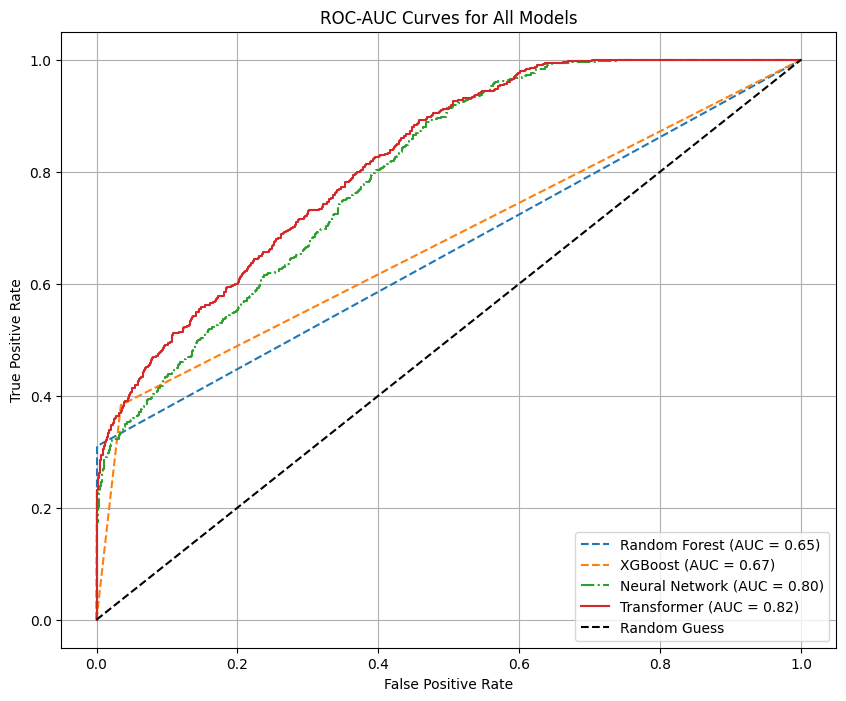

In [ ]:
# --- 4. Combined ROC-AUC Curve Plot ---
print("--- Generating Combined ROC-AUC Curve Graph ---")

# Calculate ROC curve points
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_preds)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_preds)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
transformer_fpr, transformer_tpr, _ = roc_curve(y_test, transformer_probs)

rf_auc = roc_auc_score(y_test, rf_preds)
xgb_auc = roc_auc_score(y_test, xgb_preds)
nn_auc = roc_auc_score(y_test, nn_probs)
transformer_auc = roc_auc_score(y_test, transformer_probs)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, linestyle='-.', label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(transformer_fpr, transformer_tpr, linestyle='-', label=f'Transformer (AUC = {transformer_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Aesthetics
plt.title('ROC-AUC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Leverage LLMs to summarize and interpret complex model outputs, explaining performance clearly and concisely.

- The top three features contributing to the each predictive model are listed.
- SHAP (SHapley Additive exPlanations) values are calculated to get a consistent and objective explanation of how each feature impacts the model's prediction. Positive SHAP value means positive impact on prediction, leading the model to predict 1 (deteriorated). Negative SHAP value means negative impact, leading the model to predict 0.
- ```Gemini-2.0-flash``` model is implemented to generate summary of the interpretation

In [ ]:
import pandas as pd
import shap
import requests
import os
import numpy as np
import textwrap
from google.colab import userdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='shap')
warnings.filterwarnings('ignore', module='keras')

- Random Forest

In [ ]:
# --- Model Interpretation with SHAP and Gemini (for Random Forest) ---
print("Interpreting Random Forest Model Prediction")

GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")
GEMINI_MODEL_NAME = "gemini-2.0-flash"

if GEMINI_API_KEY == "YOUR_GEMINI_API_KEY_HERE":
    print("Warning: Gemini API key is not set. The interpretation API call will fail.")
    print("Please set the GOOGLE_API_KEY environment variable.")

# Select a single instance from the test set to explain
instance_to_explain_df = X_test.iloc[[0]]
instance_to_explain_np = instance_to_explain_df.values

# Load the original clinical notes
try:
    original_data = pd.read_csv('patient_records.csv')
    original_data_index = instance_to_explain_df.index[0]
    # Check if the index from test set exists in the original data file
    if original_data_index in original_data.index:
         original_text = original_data.loc[original_data_index, 'clinical_notes']
    else:
        print(f"Warning: Index {original_data_index} not found in 'patient_records.csv'. Using a fallback.")
        original_text = "Original clinical notes not available (index mismatch)."

except (FileNotFoundError, KeyError, IndexError) as e:
    print(f"Could not retrieve original text due to error: {e}. Using a fallback.")
    original_text = "Original questionnaire text not available."

# Use SHAP to explain the model's prediction for the single instance
print("\nCalculating SHAP values for a single prediction...")
# TreeExplainer works well for RandomForest
explainer = shap.TreeExplainer(rf_model)
# Get the SHAP values
shap_values = explainer.shap_values(instance_to_explain_np)

# Handle different possible outputs from shap.TreeExplainer for binary classifiers.
# This logic corrects the ValueError by handling 3D array outputs.
if isinstance(shap_values, list):
    # Handles list output: [array_for_class_0, array_for_class_1]
    shap_values_for_class_1 = shap_values[1]
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    # Handles 3D array output: (n_samples, n_features, n_classes)
    # We want the values for the positive class (index 1)
    shap_values_for_class_1 = shap_values[:, :, 1]
else:
    # Handles the case where it's already a 2D array for the positive class
    shap_values_for_class_1 = shap_values


# Get feature names and their corresponding SHAP values
# shap_values_for_class_1 should now be 2D: (n_samples, n_features)
shap_df = pd.DataFrame(shap_values_for_class_1, columns=X_test.columns)
feature_impact = shap_df.T.sort_values(by=0, ascending=False)
print("SHAP values calculated.")

# Get the prediction probability for the instance
prediction_prob = rf_model.predict_proba(instance_to_explain_np)[0][1]
prediction = (prediction_prob > 0.5).astype(int)

# Create the prompt for the Gemini LLM
prompt_text_for_llm = f"""
A machine learning model (Random Forest) predicted patient deterioration with a probability of {prediction_prob:.2f} (Prediction: {'Deteriorated' if prediction == 1 else 'Stable'}).
The patient's original clinical notes was: "{original_text}".
The top 3 features that contributed most to this prediction were:
1. {feature_impact.index[0]} (Value: {instance_to_explain_df[feature_impact.index[0]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[0,0]:.2f})
2. {feature_impact.index[1]} (Value: {instance_to_explain_df[feature_impact.index[1]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[1,0]:.2f})
3. {feature_impact.index[2]} (Value: {instance_to_explain_df[feature_impact.index[2]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[2,0]:.2f})

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.
"""
print(f"\nGenerated Prompt for Gemini LLM:\n{prompt_text_for_llm}")

# Make the Gemini API call
gemini_url = f"https://generativelanguage.googleapis.com/v1beta/models/{GEMINI_MODEL_NAME}:generateContent?key={GEMINI_API_KEY}"
gemini_payload = {"contents": [{"parts": [{"text": prompt_text_for_llm}]}]}
try:
    print("Sending request to Gemini API for interpretation...")
    api_response = requests.post(gemini_url, json=gemini_payload)
    api_response.raise_for_status()
    response_json = api_response.json()
    summary = response_json['candidates'][0]['content']['parts'][0]['text']
    formatted_summary = textwrap.fill(summary, width=80)
    print(f"\nGenerated Summary (from Gemini):\n{formatted_summary}")
except Exception as e:
    print(f"An error occurred during Gemini LLM interpretation: {e}")

Interpreting Random Forest Model Prediction

Calculating SHAP values for a single prediction...
SHAP values calculated.

Generated Prompt for Gemini LLM:

A machine learning model (Random Forest) predicted patient deterioration with a probability of 0.62 (Prediction: Deteriorated).
The patient's original clinical notes was: "Complains of nausea and dizziness.".
The top 3 features that contributed most to this prediction were:
1. heart_rate (Value: 0.88, SHAP Value: 0.44)
2. fatigue_level_encoded (Value: 1.00, SHAP Value: 0.00)
3. respiration_rate (Value: 0.10, SHAP Value: 0.00)

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.

Sending request to Gemini API for interpretation...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Generated Summary (from Gemini):
The model predicted patient deterioration (62% probability) based on several
factors. While the patient complains of nausea and dizziness, the most
significant contributor to this prediction was **high heart rate (0.88)**, which
strongly suggested deterioration according to the model.  The model also
considered fatigue level and respiration rate, though these had less impact on
the prediction.


- XGBoost

In [ ]:
# --- Model Interpretation with SHAP and Gemini (for XGBoost) ---
print("Interpreting XGBoost Model Prediction")

# Gemini API Configuration
GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")
GEMINI_MODEL_NAME = "gemini-2.0-flash"

if GEMINI_API_KEY == "YOUR_GEMINI_API_KEY_HERE":
    print("Warning: Gemini API key is not set. The interpretation API call will fail.")
    print("Please set the GOOGLE_API_KEY environment variable.")

# Select a single instance from the test set to explain
instance_to_explain_df = X_test.iloc[[0]] # Keep as DataFrame for feature name context
instance_to_explain_np = instance_to_explain_df.values # NumPy array for model prediction

# Load the original questionnaire response
try:
    original_data = pd.read_csv('patient_records.csv')
    original_data_index = instance_to_explain_df.index[0]
    # Check if the index from test set exists in the original data file
    if original_data_index in original_data.index:
         original_text = original_data.loc[original_data_index, 'clinical_notes']
    else:
        print(f"Warning: Index {original_data_index} not found in 'patient_records.csv'. Using a fallback.")
        original_text = "Original clinical notes not available (index mismatch)."

except (FileNotFoundError, KeyError, IndexError) as e:
    print(f"Could not retrieve original text due to error: {e}. Using a fallback.")
    original_text = "Original questionnaire text not available."

# Use SHAP to explain the model's prediction for the single instance
print("\nCalculating SHAP values for a single prediction...")
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(instance_to_explain_np)

# Get feature names and their corresponding SHAP values
shap_df = pd.DataFrame([shap_values[0]], columns=X_test.columns)
feature_impact = shap_df.T.sort_values(by=0, ascending=False)
print("SHAP values calculated.")

# Get the prediction probability for the instance
prediction_prob = xgb_model.predict_proba(instance_to_explain_np)[0][1]
prediction = (prediction_prob > 0.5).astype(int)

# Create the prompt for the Gemini LLM
prompt_text_for_llm = f"""
A machine learning model (XGBoost) predicted patient deterioration with a probability of {prediction_prob:.2f} (Prediction: {'Deteriorated' if prediction == 1 else 'Stable'}).
The patient's original clinical notes was: "{original_text}".
The top 3 features that contributed most to this prediction were:
1. {feature_impact.index[0]} (Value: {instance_to_explain_df[feature_impact.index[0]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[0,0]:.2f})
2. {feature_impact.index[1]} (Value: {instance_to_explain_df[feature_impact.index[1]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[1,0]:.2f})
3. {feature_impact.index[2]} (Value: {instance_to_explain_df[feature_impact.index[2]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[2,0]:.2f})

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.
"""
print(f"\nGenerated Prompt for Gemini LLM:\n{prompt_text_for_llm}")

# Make the Gemini API call
gemini_url = f"https://generativelanguage.googleapis.com/v1beta/models/{GEMINI_MODEL_NAME}:generateContent?key={GEMINI_API_KEY}"
gemini_payload = {"contents": [{"parts": [{"text": prompt_text_for_llm}]}]}
try:
    print("Sending request to Gemini API for interpretation...")
    api_response = requests.post(gemini_url, json=gemini_payload)
    api_response.raise_for_status()
    response_json = api_response.json()
    summary = response_json['candidates'][0]['content']['parts'][0]['text']
    formatted_summary = textwrap.fill(summary, width=80)
    print(f"\nGenerated Summary (from Gemini):\n{formatted_summary}")
except Exception as e:
    print(f"An error occurred during Gemini LLM interpretation: {e}")

Interpreting XGBoost Model Prediction

Calculating SHAP values for a single prediction...
SHAP values calculated.

Generated Prompt for Gemini LLM:

A machine learning model (XGBoost) predicted patient deterioration with a probability of 1.00 (Prediction: Deteriorated).
The patient's original clinical notes was: "Complains of nausea and dizziness.".
The top 3 features that contributed most to this prediction were:
1. heart_rate (Value: 0.88, SHAP Value: 9.33)
2. systolic_bp (Value: 0.88, SHAP Value: 0.14)
3. embed_144 (Value: -0.24, SHAP Value: 0.12)

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.

Sending request to Gemini API for interpretation...

Generated Summary (from Gemini):
The model predicted this patient would deteriorate, driven primarily by a
significantly elevated heart rate. While sy

- Neural Network

In [ ]:
# --- Model Interpretation with SHAP and Gemini (for Neural Network) ---
print("Interpreting Neural Network Model Prediction")

# Gemini API Configuration
GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")
GEMINI_MODEL_NAME = "gemini-2.0-flash"

if GEMINI_API_KEY == "YOUR_GEMINI_API_KEY_HERE":
    print("Warning: Gemini API key is not set. The interpretation API call will fail.")
    print("Please set the GOOGLE_API_KEY environment variable.")

# DataFrame version of X_test for column names later
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select a single instance from the test set to explain
instance_to_explain_df = X_test_df.iloc[[0]]
instance_to_explain_np = instance_to_explain_df.values

# Load the original clinical notes
try:
    original_data = pd.read_csv('patient_records.csv')
    original_data_index = instance_to_explain_df.index[0]
    if original_data_index in original_data.index:
         original_text = original_data.loc[original_data_index, 'clinical_notes']
    else:
        print(f"Warning: Index {original_data_index} not found in 'patient_records.csv'. Using a fallback.")
        original_text = "Original clinical notes not available (index mismatch)."

except (FileNotFoundError, KeyError, IndexError) as e:
    print(f"Could not retrieve original text due to error: {e}. Using a fallback.")
    original_text = "Original questionnaire text not available."

# Use SHAP to explain the model's prediction for the single instance
print("\nCalculating SHAP values for a single prediction...")
explainer = shap.DeepExplainer(nn_model, X_train)
shap_values = explainer.shap_values(instance_to_explain_np)

# For a single-output model, shap_values is typically a list with one array or a 3D array.
if isinstance(shap_values, list):
    shap_values_for_output = shap_values[0]
else:
    shap_values_for_output = shap_values

# Ensure the array is 2D for DataFrame constructor
if shap_values_for_output.ndim == 3 and shap_values_for_output.shape[2] == 1:
    shap_values_for_output = shap_values_for_output[:, :, 0] # Remove the last dimension

# Get feature names and their corresponding SHAP values
shap_df = pd.DataFrame(shap_values_for_output, columns=X_test_df.columns)
feature_impact = shap_df.T.sort_values(by=0, ascending=False)
print("SHAP values calculated.")

# Get the prediction probability for the instance
prediction_prob = nn_model.predict(instance_to_explain_np)[0][0]
prediction = (prediction_prob > 0.5).astype(int)

# Create the prompt for the Gemini LLM
prompt_text_for_llm = f"""
A machine learning model (Neural Network) predicted patient deterioration with a probability of {prediction_prob:.2f} (Prediction: {'Deteriorated' if prediction == 1 else 'Stable'}).
The patient's original clinical notes was: "{original_text}".
The top 3 features that contributed most to this prediction were:
1. {feature_impact.index[0]} (Value: {instance_to_explain_df[feature_impact.index[0]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[0,0]:.2f})
2. {feature_impact.index[1]} (Value: {instance_to_explain_df[feature_impact.index[1]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[1,0]:.2f})
3. {feature_impact.index[2]} (Value: {instance_to_explain_df[feature_impact.index[2]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[2,0]:.2f})

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.
"""
print(f"\nGenerated Prompt for Gemini LLM:\n{prompt_text_for_llm}")

# Make the Gemini API call
gemini_url = f"https://generativelanguage.googleapis.com/v1beta/models/{GEMINI_MODEL_NAME}:generateContent?key={GEMINI_API_KEY}"
gemini_payload = {"contents": [{"parts": [{"text": prompt_text_for_llm}]}]}
try:
    print("Sending request to Gemini API for interpretation...")
    api_response = requests.post(gemini_url, json=gemini_payload)
    api_response.raise_for_status()
    response_json = api_response.json()
    summary = response_json['candidates'][0]['content']['parts'][0]['text']
    formatted_summary = textwrap.fill(summary, width=80)
    print(f"\nGenerated Summary (from Gemini):\n{formatted_summary}")
except Exception as e:
    print(f"An error occurred during Gemini LLM interpretation: {e}")

Interpreting Neural Network Model Prediction

Calculating SHAP values for a single prediction...
SHAP values calculated.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Generated Prompt for Gemini LLM:

A machine learning model (Neural Network) predicted patient deterioration with a probability of 0.66 (Prediction: Deteriorated).
The patient's original clinical notes was: "Complains of nausea and dizziness.".
The top 3 features that contributed most to this prediction were:
1. heart_rate (Value: 0.88, SHAP Value: 0.48)
2. embed_78 (Value: -0.21, SHAP Value: 0.02)
3. embed_356 (Value: 0.03, SHAP Value: 0.01)

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.

Sending request to Gemini API for interpretation...

Generated Summary (from Gemini):
The model predicted patient deterioration (66% probability) primari

- Multi-modal

In [ ]:
# --- Model Interpretation with SHAP and Gemini (for Multi-Modal) ---
print("Interpreting Multi-Modal Model Prediction using GradientExplainer")

tf.experimental.numpy.experimental_enable_numpy_behavior()

# Gemini API Configuration
GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")
GEMINI_MODEL_NAME = "gemini-2.0-flash"

if GEMINI_API_KEY == "YOUR_GEMINI_API_KEY_HERE":
    print("Warning: Gemini API key is not set. The interpretation API call will fail.")
    print("Please set the GOOGLE_API_KEY environment variable.")

# SHAP Interpretation
instance_index_to_explain = 0

# Convert single instance NumPy arrays to TensorFlow Tensors
instance_to_explain_num_tf = tf.constant(X_test_num[[instance_index_to_explain]], dtype=tf.float32)
instance_to_explain_embed_tf = tf.constant(X_test_embed[[instance_index_to_explain]], dtype=tf.float32)

# For displaying feature values and names, use the original NumPy arrays in a DataFrame
instance_to_explain_df = pd.DataFrame(
    np.concatenate([X_test_num[[instance_index_to_explain]], X_test_embed[[instance_index_to_explain]]], axis=1),
    columns=numerical_cols + embedding_cols
)

# Load the original clinical notes
try:
    original_data = pd.read_csv('patient_records.csv')
    original_data_index = X_test.index[instance_index_to_explain]
    if original_data_index in original_data.index:
            original_text = original_data.loc[original_data_index, 'clinical_notes']
    else:
        print(f"Warning: Index {original_data_index} not found in 'patient_records.csv'. Using a fallback.")
        original_text = "Original clinical notes not available (index mismatch)."
except (FileNotFoundError, KeyError, IndexError) as e:
    print(f"Could not retrieve original text due to error: {e}. Using a fallback.")
    original_text = "Original questionnaire text not available."

print("\nCalculating SHAP values for a single prediction...")

# Prepare background data for SHAP, converting to TensorFlow Tensors
background_data_num_tf = tf.constant(X_train_num, dtype=tf.float32)
background_data_embed_tf = tf.constant(X_train_embed, dtype=tf.float32)

if X_train_num.shape[0] > 5000:
    sample_size = 1000
    background_indices = np.random.choice(X_train_num.shape[0], sample_size, replace=False)
    background_data_num_tf = tf.constant(X_train_num[background_indices], dtype=tf.float32)
    background_data_embed_tf = tf.constant(X_train_embed[background_indices], dtype=tf.float32)

# Initialize GradientExplainer with the Keras model and a LIST of TensorFlow Tensors for background
explainer = shap.GradientExplainer(transformer_model, [background_data_num_tf, background_data_embed_tf])

# Get the SHAP values for the instance, passing a LIST of TensorFlow Tensors
shap_values = explainer.shap_values([instance_to_explain_num_tf, instance_to_explain_embed_tf])

shap_values_num = shap_values[0].flatten()
shap_values_embed = shap_values[1].flatten()

# Combine SHAP values and feature names into a single 1D array
all_shap_values = np.concatenate([shap_values_num, shap_values_embed])
all_feature_names = numerical_cols + embedding_cols

# DataFrame by wrapping the 1D array in a list, making it a (1, total_features) 2D input
shap_df = pd.DataFrame([all_shap_values], columns=all_feature_names)
feature_impact = shap_df.T.sort_values(by=0, ascending=False)
print("SHAP values calculated.")

# Get the prediction probability for the instance (using the original model with TensorFlow inputs)
prediction_prob = transformer_model.predict([instance_to_explain_num_tf, instance_to_explain_embed_tf])[0][0]
prediction = (prediction_prob > 0.5).astype(int)

# Create the prompt for the Gemini LLM
prompt_text_for_llm = f"""
A machine learning model (Transformer-based Neural Network) predicted patient deterioration with a probability of {prediction_prob:.2f} (Prediction: {'Deteriorated' if prediction == 1 else 'Stable'}).
The patient's original clinical notes was: "{original_text}".
The top 3 features that contributed most to this prediction were:
1. {feature_impact.index[0]} (Value: {instance_to_explain_df[feature_impact.index[0]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[0,0]:.2f})
2. {feature_impact.index[1]} (Value: {instance_to_explain_df[feature_impact.index[1]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[1,0]:.2f})
3. {feature_impact.index[2]} (Value: {instance_to_explain_df[feature_impact.index[2]].values[0]:.2f}, SHAP Value: {feature_impact.iloc[2,0]:.2f})

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.
"""
print(f"\nGenerated Prompt for Gemini LLM:\n{prompt_text_for_llm}")

# Make the Gemini API call
gemini_url = f"https://generativelanguage.googleapis.com/v1beta/models/{GEMINI_MODEL_NAME}:generateContent?key={GEMINI_API_KEY}"
gemini_payload = {"contents": [{"parts": [{"text": prompt_text_for_llm}]}]}
try:
    print("Sending request to Gemini API for interpretation...")
    api_response = requests.post(gemini_url, json=gemini_payload)
    api_response.raise_for_status()
    response_json = api_response.json()
    summary = response_json['candidates'][0]['content']['parts'][0]['text']
    formatted_summary = textwrap.fill(summary, width=80)
    print(f"\nGenerated Summary (from Gemini):\n{formatted_summary}")
except Exception as e:
    print(f"An error occurred during Gemini LLM interpretation: {e}")

Interpreting Multi-Modal Model Prediction using GradientExplainer

Calculating SHAP values for a single prediction...
SHAP values calculated.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Generated Prompt for Gemini LLM:

A machine learning model (Transformer-based Neural Network) predicted patient deterioration with a probability of 0.72 (Prediction: Deteriorated).
The patient's original clinical notes was: "Complains of nausea and dizziness.".
The top 3 features that contributed most to this prediction were:
1. heart_rate (Value: 0.88, SHAP Value: 0.59)
2. temperature (Value: 0.56, SHAP Value: 0.01)
3. fatigue_level_encoded (Value: 1.00, SHAP Value: 0.01)

A positive SHAP value means the feature pushed the prediction towards deterioration; a negative value pushed it towards stable.
Provide a concise, easy-to-understand summary for a clinician, explaining why the model made this prediction.

Sending request to Gemini API for interpretation...

Generated Summary (from Gemini):
The model predi